In [9]:
%matplotlib inline
import pylab
import numpy as np
import scipy.io



Load the data from the file.

In [10]:
data = scipy.io.loadmat('data_for_cosine.mat')
X = data['X']
Y = data['Y']


Let's start by just looking at the first data set

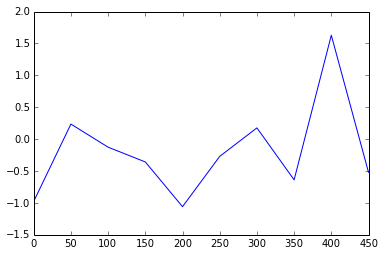

In [45]:
x = X[:10,0]
y = Y[:10,0]
pylab.plot(x, y);

Do the curve fitting

In [46]:
def curve(x, offset, ampl, freq, phase):
    v = offset + ampl*np.cos(x*0.001 * 2 * np.pi * freq + phase)
    return v

import scipy.optimize

p = scipy.optimize.curve_fit(curve, x, y)

[-0.15792269 -0.34807941  1.6816254  -1.34335977]


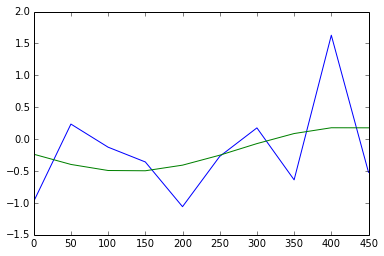

In [47]:
pylab.plot(x, y)
pylab.plot(x, curve(x, *p[0]))
print p[0]

Now let's do that for each data set individually

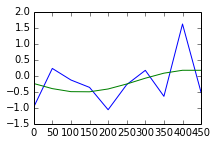

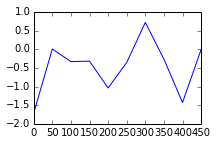

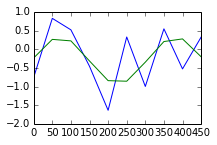

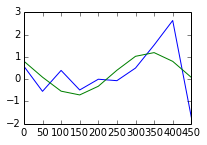

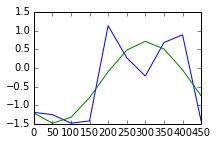

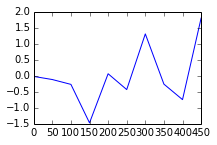

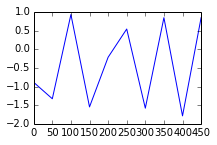

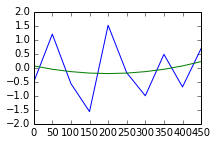

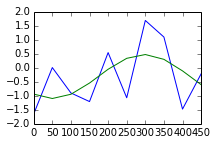

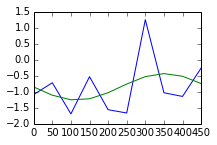

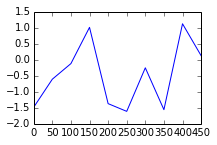

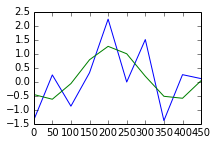

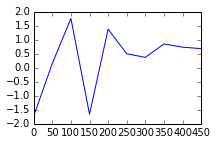

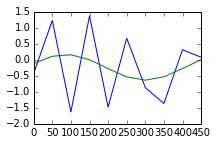

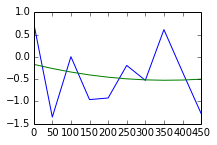

In [44]:
size = 10
index = 0
while index + size < len(X):
    x = X[index:index+size, 0]
    y = Y[index:index+size, 0]
    pylab.figure(figsize=(3,2))
    pylab.plot(x, y)
    
    try:
        p = scipy.optimize.curve_fit(curve, x, y)
        pylab.plot(x, curve(x, *p[0]))
    except RuntimeError:
        pass
    
    index += size